In [17]:
# khai báo thư viện cần dùng:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [4]:
# Đọc dữ liệu
df=pd.read_csv('OnlineRetail.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
# Thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [19]:
# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
#Các cột chứa giá trị khuyết thiếu
print('Các cột chứa dữ liệu khuyết thiếu là:')
for index, column in enumerate(df.columns):
    temp = df.loc[:,column].isnull()
    if temp.sum() > 0:
        print('Cột', df.columns[index], 'chứa' , temp.sum() , 'giá trị KT')
#Số lượng dòng chứa giá trị khuyết thiếu
print('Tổng số lượng dòng có chứa giá trị khuyết thiếu là: ', df.shape[0] - df.dropna().shape[0])

Các cột chứa dữ liệu khuyết thiếu là:
Cột CustomerID chứa 135080 giá trị KT
Tổng số lượng dòng có chứa giá trị khuyết thiếu là:  135080


In [20]:
# Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao
print('Bởi vì số lượng dòng chứa giá trị khuyết thiếu rất nhiều, nên không thể xóa những dòng này')

Bởi vì số lượng dòng chứa giá trị khuyết thiếu rất nhiều, nên không thể xóa những dòng này


##### Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

In [21]:
df.loc[:,'Description'].fillna('Không biết', inplace=True)

##### Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice


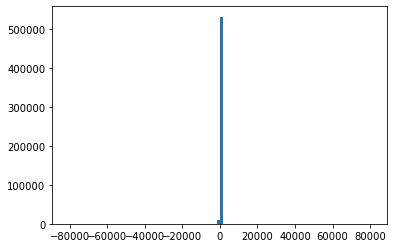

In [23]:
plt.hist(df['Quantity'], bins=100)
plt.show()

In [24]:
df2=df[df['Quantity']>0]
df2

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


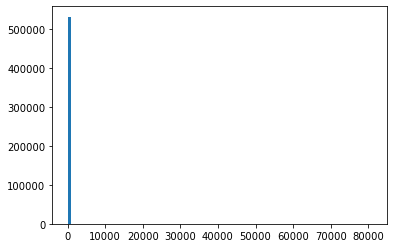

In [25]:
plt.hist(df2['Quantity'], bins=100)
plt.show()

upper bound quantity:28.0
lower bound quantity:-17.0
9         32
31        48
44        36
46        80
65        32
          ..
541835    40
541865    40
541866    36
541867    72
541868    48
Name: Quantity, Length: 27105, dtype: int64
27105


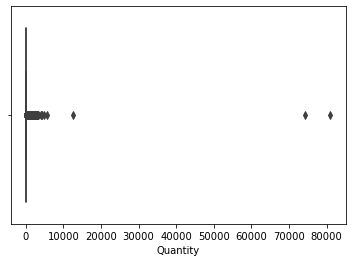

In [30]:
# ngoại lai của thuộc tính Quantity:
Q1_quantity=df2.loc[:,'Quantity'].quantile(0.25, 'linear')
Q3_quantity=df2.loc[:,'Quantity'].quantile(0.75)
IQR_quantity=Q3_quantity-Q1_quantity
upper_quantity=(Q3_quantity+2*IQR_quantity)
print(f'upper bound quantity:{upper_quantity}')
lower_quantity=(Q1_quantity-2*IQR_quantity)
print(f'lower bound quantity:{lower_quantity}')

df3 = df2.loc[:,:][(df2['Quantity']<upper_quantity)&(df2['Quantity']>lower_quantity)]

sns.boxplot(x=df2['Quantity']) 
print(df2.loc[:,'Quantity'][(df2['Quantity']>upper_quantity)|(df2['Quantity']<lower_quantity)])
print(df2.loc[:,'Quantity'][(df2['Quantity']>upper_quantity)|(df2['Quantity']<lower_quantity)].count())

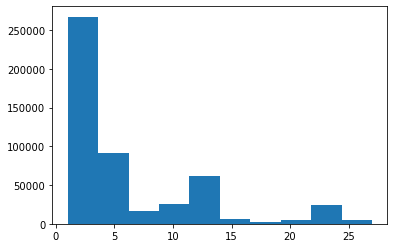

In [28]:
plt.hist(df3['Quantity'], bins=10)
plt.show()

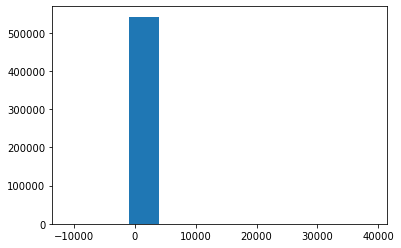

In [31]:
plt.hist(df['UnitPrice'], bins=10)
plt.show()

In [32]:
df4 = df3.loc[df3.loc[:,'UnitPrice']>0,:]
df4

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


upper bound quantity:8.45
lower bound quantity:-3.0700000000000003
16         9.95
45        18.00
151       14.95
152       14.95
153       16.95
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: UnitPrice, Length: 37694, dtype: float64
37694


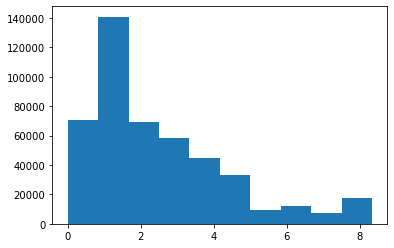

In [35]:
# ngoại lai của thuộc tính UnitPrice:
Q1_quantity=df4.loc[:,'UnitPrice'].quantile(0.25, 'linear')
Q3_quantity=df4.loc[:,'UnitPrice'].quantile(0.75)
IQR_quantity=Q3_quantity-Q1_quantity
upper_quantity=(Q3_quantity+1.5*IQR_quantity)
print(f'upper bound quantity:{upper_quantity}')
lower_quantity=(Q1_quantity-1.5*IQR_quantity)
print(f'lower bound quantity:{lower_quantity}')

df5 = df4.loc[:,:][(df4['UnitPrice']<upper_quantity)&(df4['UnitPrice']>lower_quantity)]

print(df4.loc[:,'UnitPrice'][(df4['UnitPrice']>upper_quantity)|(df4['UnitPrice']<lower_quantity)])
print(df4.loc[:,'UnitPrice'][(df4['UnitPrice']>upper_quantity)|(df4['UnitPrice']<lower_quantity)].count())

plt.hist(df5['UnitPrice'], bins=10)
plt.show()

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465373 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   465373 non-null  int64  
 1   InvoiceNo    465373 non-null  object 
 2   StockCode    465373 non-null  object 
 3   Description  465373 non-null  object 
 4   Quantity     465373 non-null  int64  
 5   InvoiceDate  465373 non-null  object 
 6   UnitPrice    465373 non-null  float64
 7   CustomerID   349736 non-null  float64
 8   Country      465373 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 35.5+ MB


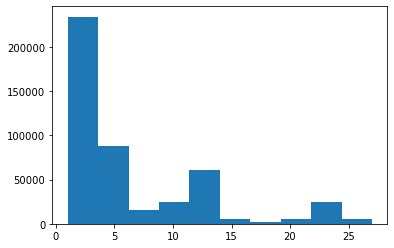

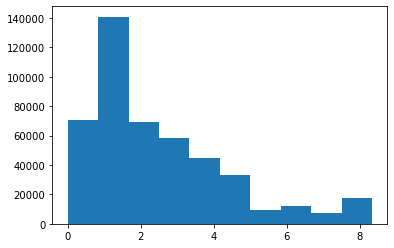

In [38]:
plt.hist(df5['Quantity'], bins=10)
plt.show()

plt.hist(df5['UnitPrice'], bins=10)
plt.show()

### Nhận xét dữ liệu:
#### Đồ thị Quantity: Số lượng mặt hàng trong 1 đơn:
##### Đồ thị biểu có 3 đỉnh==> có 3 khoảng giá trị số lượng đặt hàng là phổ biến
##### Khách hàng đa phần mua lẻ số lượng ít từ 1 đến 5 đơn vị. nhóm thứ 2 số lượng khách không quá nhiều đặt khoảng từ 10 đến 15 đơn vị
##### Nhóm 3 có một lượng nhỏ khách hàng mua đơn nhiều 20 đến 25 đơn vị mỗi đơn.


####  Đồ thị Unit Price:
##### Các sản phẩm đa phần trong mức giá thấp dưới 10 USD
##### Phần nhiều nhất là sản phẩm giá rẻ trong khoảng 1 USD
##### Các sản phẩm giá rẻ bán mỗi lần số lượng ít, mỗi đơn khoảng 5 pcs